In [76]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator 
import numpy as np
import graphviz
from graphviz import Digraph
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

In [77]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [78]:
iris = load_iris()
X = iris.data[::]
Y = iris.target[:]
for i in range(50):
    Y[i] = -1
    Y[i+50] = 0
    Y[i+100] = 1

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [80]:
# Fit for various depth trees
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='entropy', max_depth=i+1, random_state=0)
    tree.fit(X_train, Y_train)

    X_combined = np.vstack((X_train, X_test))
    Y_combined = np.hstack((Y_train, Y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X_train,Y_train)
    Errors[i,1] = 1 - tree.score(X_test,Y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.31000000000000005 0.38
2 0.050000000000000044 0.09999999999999998
3 0.020000000000000018 0.040000000000000036
4 0.010000000000000009 0.06000000000000005
5 0.010000000000000009 0.06000000000000005


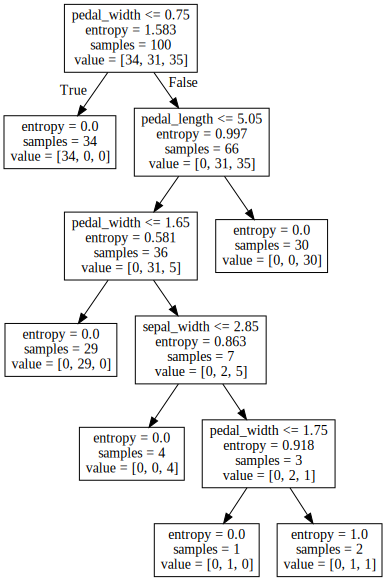

In [81]:
export_graphviz(tree, out_file='iris1.dot', feature_names=['sepal_length','sepal_width','pedal_length','pedal_width'])
with open('iris1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

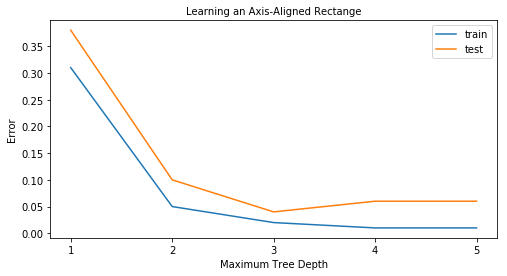

In [82]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Axis-Aligned Rectange', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=0)

In [84]:
# Fit for various depth trees
MaxDepth = 5
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X_train, Y_train)

    X_combined = np.vstack((X_train, X_test))
    Y_combined = np.hstack((Y_train, Y_test))

    # optional outputs
    z = tree.apply(X_combined)
    #print(z)
    dp = tree.decision_path(X_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X_train,Y_train)
    Errors[i,1] = 1 - tree.score(X_test,Y_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.31000000000000005 0.38
2 0.040000000000000036 0.07999999999999996
3 0.020000000000000018 0.020000000000000018
4 0.0 0.020000000000000018
5 0.0 0.020000000000000018


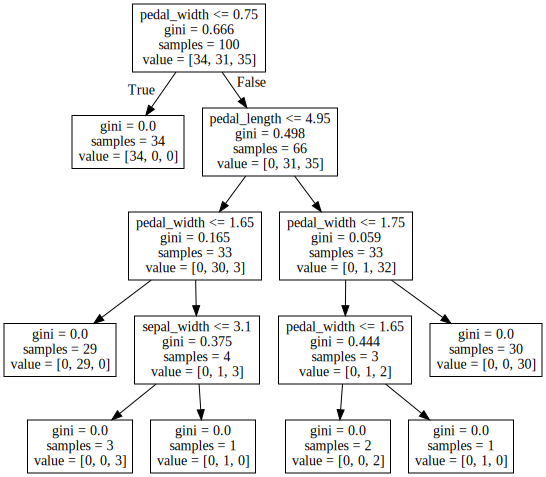

In [85]:
export_graphviz(tree, out_file='iris2.dot', feature_names=['sepal_length','sepal_width','pedal_length','pedal_width'])
with open('iris2.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

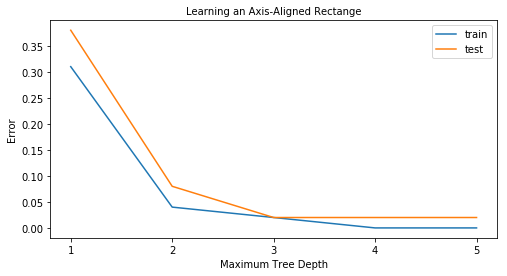

In [75]:
# plot errors by tree depth    
  
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Axis-Aligned Rectange', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show() 


In [55]:
"""
Seems like using Gini impurity we have a much better accuracy on both training and testing set, with training set reach 100% accuracy
on epoch4 compare to 99% at epoch 5 for entropy, similar for testing set.
Lets test for using gini at the triangle set I created!

"""

'\nSeems like using Gini impurity we have a much better accuracy on both training and testing set, with training set reach 100% accuracy\non epoch4 compare to 99% at epoch 5 for entropy, similar for testing set.\nLets test for using gini at the triangle set I created!\n\n'

In [63]:
# Using formula Y = 4-2X and Y = 2X (assume X[i,0] is x and X[i,1] is y)
# which is equivelent to Y+2X >=4 and Y>= 2X transform it to 2d graph
npts = 10000

X7 = np.zeros((npts,4))
y7 = np.zeros(npts)

for i in range(0,npts): 
    X7[i,0] = np.random.uniform(0.0,2.0) 
    X7[i,1] = np.random.uniform(0.0,2.0)
    #if (X7[i,0] < X7[i,1] or X7[i,0]+X7[i,1] >= 2 ) :
    if (2* X7[i,0]+X7[i,1] >=  4 or X7[i,1] >= 2*X7[i,0]) :
        y7[i] = 0
    else:
        y7[i] = 1
        

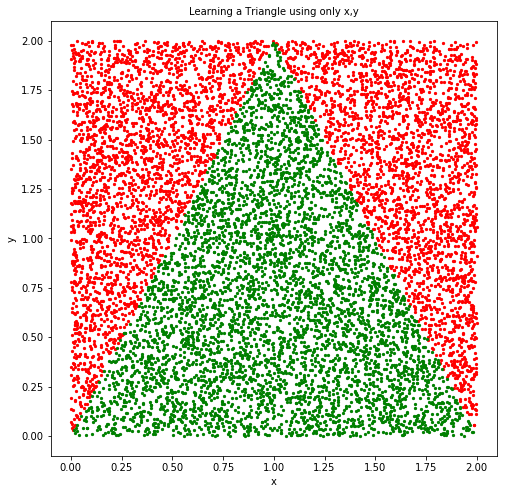

In [64]:
plt.close('all')
plt.figure(figsize=(8, 8))
plt.title('Learning a Triangle using only x,y', fontsize='medium')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x = X7[y7==0, 0], y = X7[y7==0, 1], color='red', label='0', s=5)
plt.scatter(x = X7[y7==1, 0], y = X7[y7==1, 1], color='green', label='1', s=5)
plt.axis(range=1, aspect=1)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

In [65]:
#Spliting the data

X7_train, X7_test, y7_train, y7_test = train_test_split(
         X7, y7, test_size=0.50, random_state=0)

In [66]:
# Fit for various depth trees
MaxDepth = 10
Errors = np.zeros((MaxDepth,2))

print ('Max Depth, Training, Test')

for i in range(0,MaxDepth):
    tree = DecisionTreeClassifier(criterion='gini', max_depth=i+1, random_state=0)
    tree.fit(X7_train, y7_train)

    X7_combined = np.vstack((X7_train, X7_test))
    y7_combined = np.hstack((y7_train, y7_test))

    # optional outputs
    z = tree.apply(X7_combined)
    #print(z)
    dp = tree.decision_path(X7_combined)
    #print (dp)
      
    Errors[i,0] = 1 - tree.score(X7_train,y7_train)
    Errors[i,1] = 1 - tree.score(X7_test,y7_test)
    print(i+1,Errors[i,0],Errors[i,1])

Max Depth, Training, Test
1 0.253 0.25839999999999996
2 0.2136 0.2198
3 0.11980000000000002 0.13260000000000005
4 0.08220000000000005 0.10299999999999998
5 0.04959999999999998 0.06299999999999994
6 0.0242 0.041200000000000014
7 0.00880000000000003 0.026800000000000046
8 0.0036000000000000476 0.022199999999999998
9 0.0008000000000000229 0.02100000000000002
10 0.0 0.021199999999999997


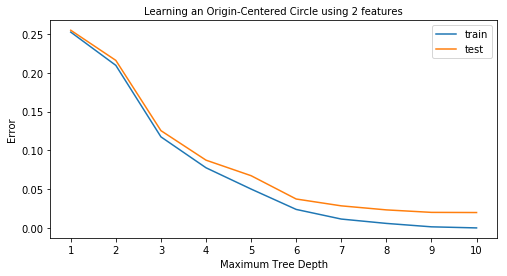

In [60]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (8,4))
ax.set_xlabel('Maximum Tree Depth')
ax.set_ylabel('Error')
ax.set_title('Learning an Origin-Centered Circle using 2 features', fontsize ='medium')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot(np.arange(1,MaxDepth+1),Errors[:,0], label='train')
ax.plot(np.arange(1,MaxDepth+1),Errors[:,1], label='test')
ax.legend(loc='upper right', fontsize='medium')
plt.show()

In [ ]:
""" This time, entropy method acutally beat gini impurity! Looks like before we actually tested each method, we have no way to 
tell which one is better. And for each type of dataset, the answer can vary. This is actually the biggest thing I learned in this course
that there is no 'best method'!"""


"""
Additional note: each time I rerun the code, the answer varied. Sometime Gini is better, sometime entropy wins. It is confirmed that for 
each different dataset, the best method varied. As expected for the iris, the answer stay the same, as the dataset itself and the random
state for the train_test split function doesn't change, so everytime Gini beats entropy.
"""